In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib as mpl
import numpy as np
import scipy as sp
import json
import sys

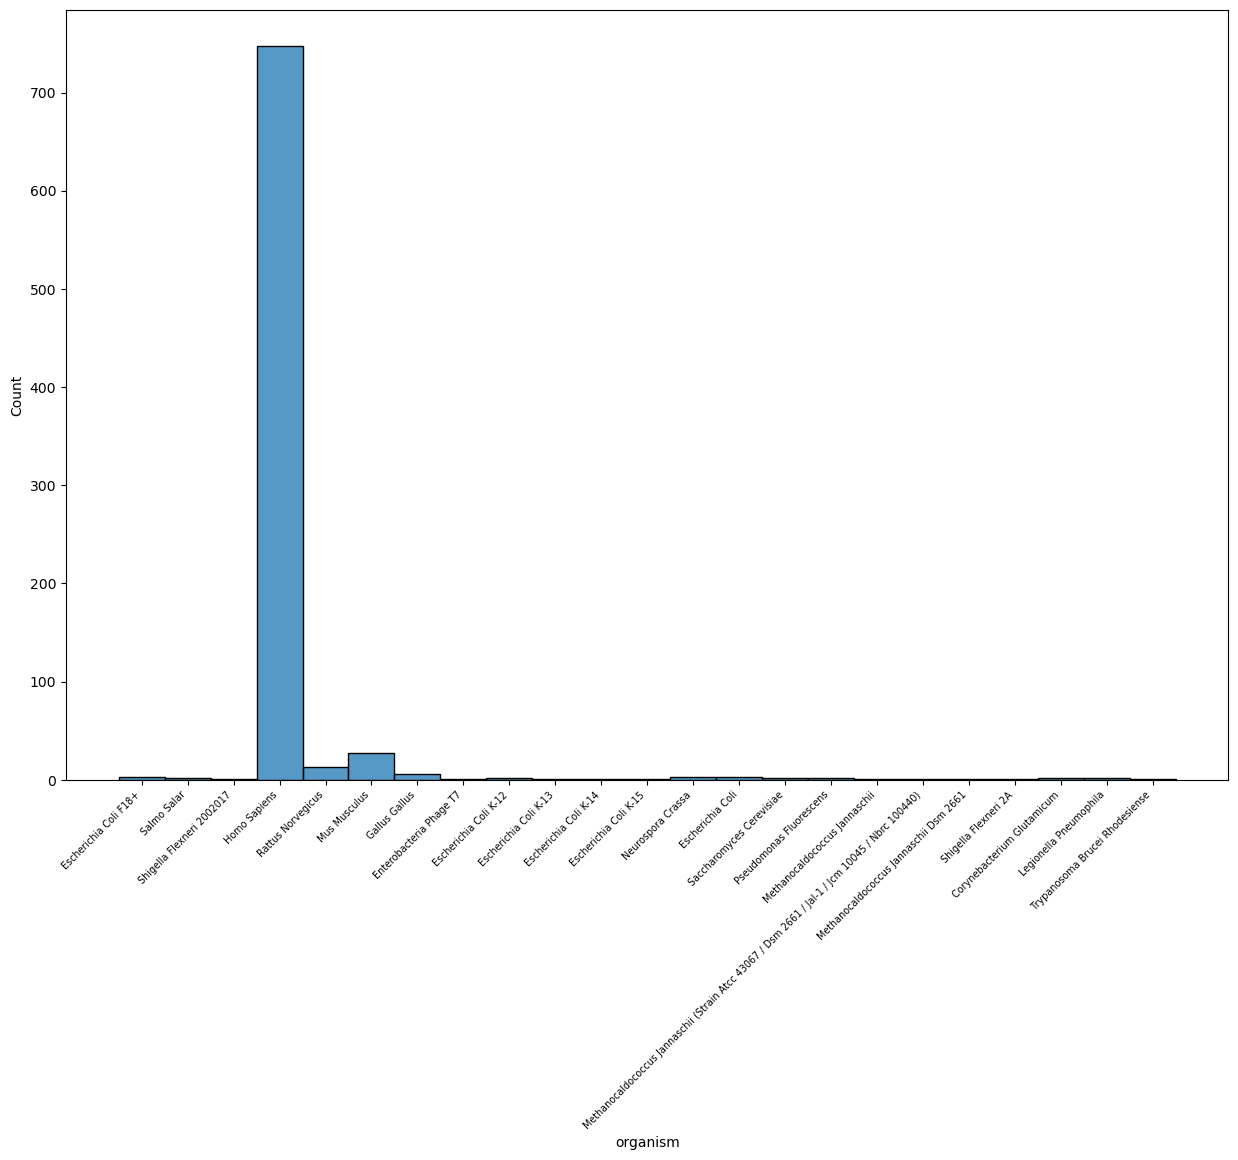

<Figure size 640x480 with 0 Axes>

In [3]:
'''
Determining the species distribution for our proteins.
'''

df = pd.read_csv('./project_pipeline/data/classified_files_3.tsv', sep='\t').astype('object')

df['organism'] = df['organism'].str.strip('"').str.title()

# Make the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.histplot(data=df, x='organism', ax=ax)
plt.xticks(rotation=45, fontsize='x-small', ha='right')

plt.show()
plt.savefig('./project_pipeline/data/figures/organism_distribution.png')

/home/bjechow/anaconda3/envs/rmsd_snek/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/bjechow/anaconda3/envs/rmsd_snek/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Axes: xlabel='conformation', ylabel='2_comp'>

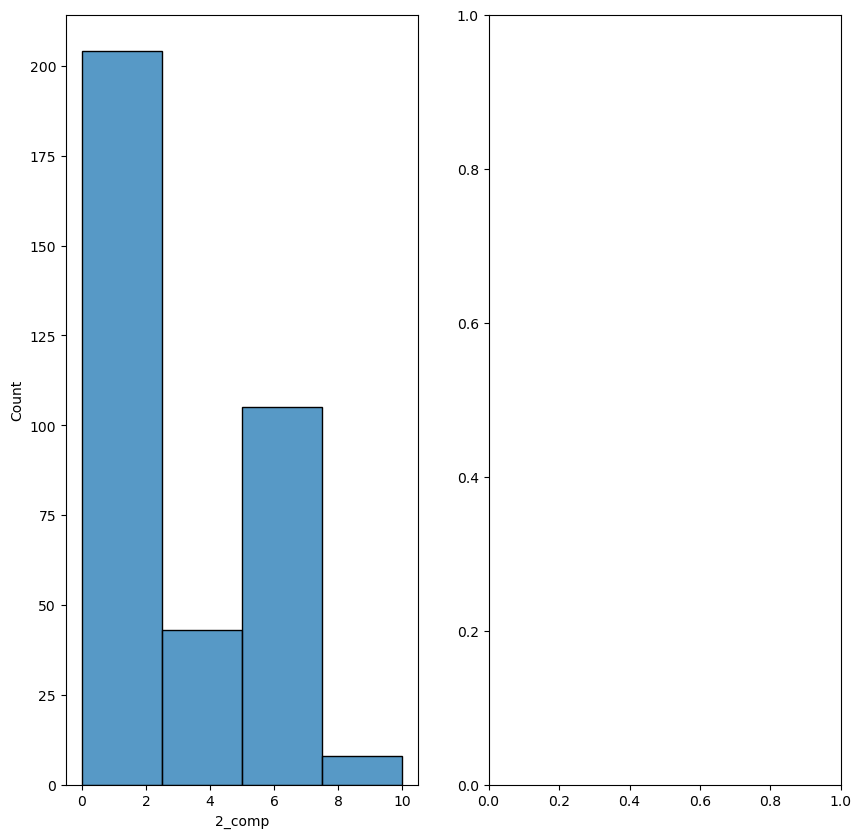

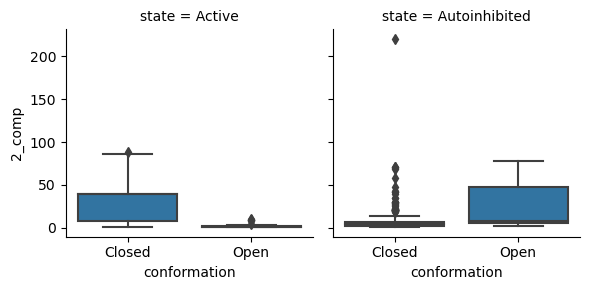

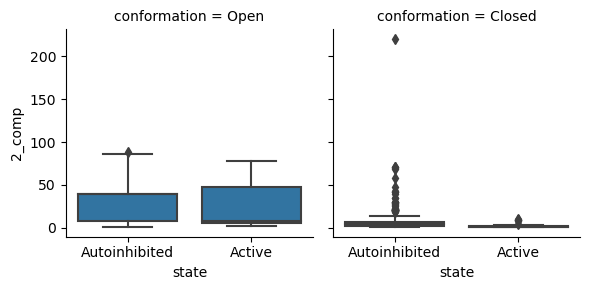

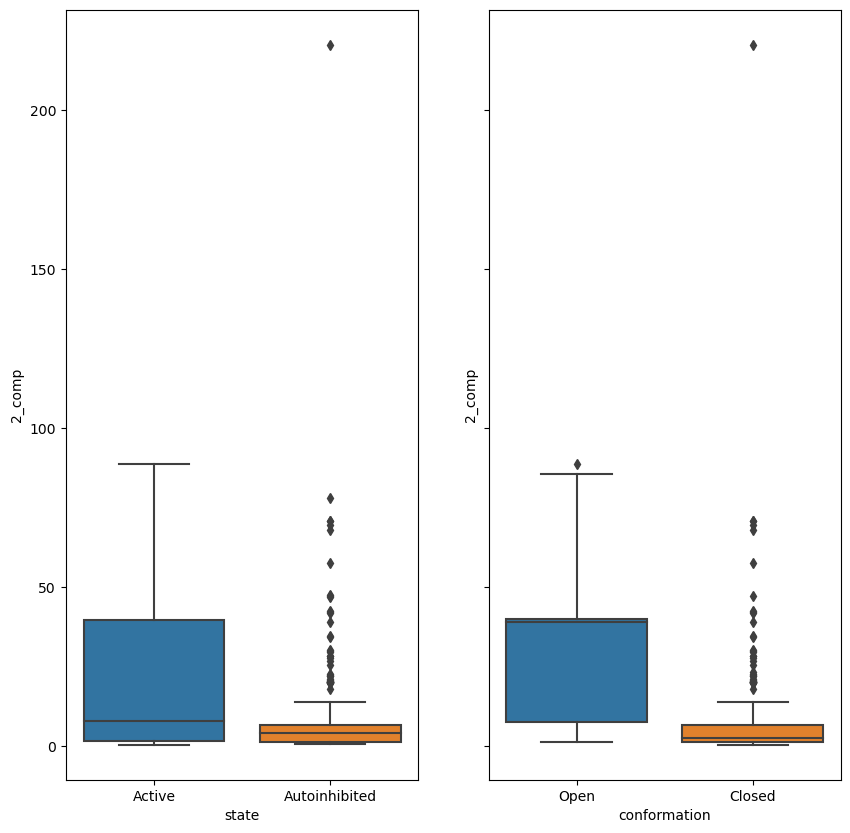

In [12]:
df = df.astype({'2_comp': 'float'})
df_active = df[df['state'] == 'Active']
df_autoin = df[df['state'] == 'Autoinhibited']
df_open = df[df['conformation'] == 'Open']
df_closed = df[df['conformation'] == 'Closed']

# Annotate whether structure is within 2.5 A of the closed structured

# Annotate whether structure is greater than 2.5 A from the open structure
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
sns.histplot(data=df_closed, x='2_comp', ax=axes[0], binrange=(0, 10), bins=4)

g4 = sns.FacetGrid(data=df, col='state')
g4.map(sns.boxplot, 'conformation', '2_comp')

g5 = sns.FacetGrid(data=df, col='conformation')
g5.map(sns.boxplot, 'state', '2_comp')

fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharey=True)

sns.boxplot(ax=axes[0], data=df, x='state', y='2_comp')

sns.boxplot(ax=axes[1], data=df, x='conformation', y='2_comp')